In [4]:
!pip install nb_black
%load_ext nb_black
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from google.colab import files as colab_files
uploaded = colab_files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


Saving Trout_testing_features.csv to Trout_testing_features.csv
Saving Trout_training.csv to Trout_training.csv


<IPython.core.display.Javascript object>

In [5]:
# Load data
trout_training_df = pd.read_csv(
    r"Trout_training.csv"
)
trout_testing_features_df = pd.read_csv(
    r"Trout_testing_features.csv"
)

<IPython.core.display.Javascript object>

# **EDA**

In [14]:
trout_training_df.describe().round(2)

,Water_Temp_C,Depth_m
count,839215.00,839215.00
mean,6.34,9.63
std,5.59,5.56
min,0.27,1.50
25%,1.99,4.50
50%,5.05,9.50
75%,8.24,14.50
max,25.77,20.50


<IPython.core.display.Javascript object>

In [16]:
trout_training_df.isnull().sum()

Date_Time       0
Water_Temp_C    0
Depth_m         0
Date            0
dtype: int64

<IPython.core.display.Javascript object>

**Detect the Outliers**

In [36]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trout_training_df)
sns.boxplot(trout_training_df['Water_Temp_C'])
print(np.where(trout_training_df['Water_Temp_C']>17))

ValueError: ignored

<IPython.core.display.Javascript object>

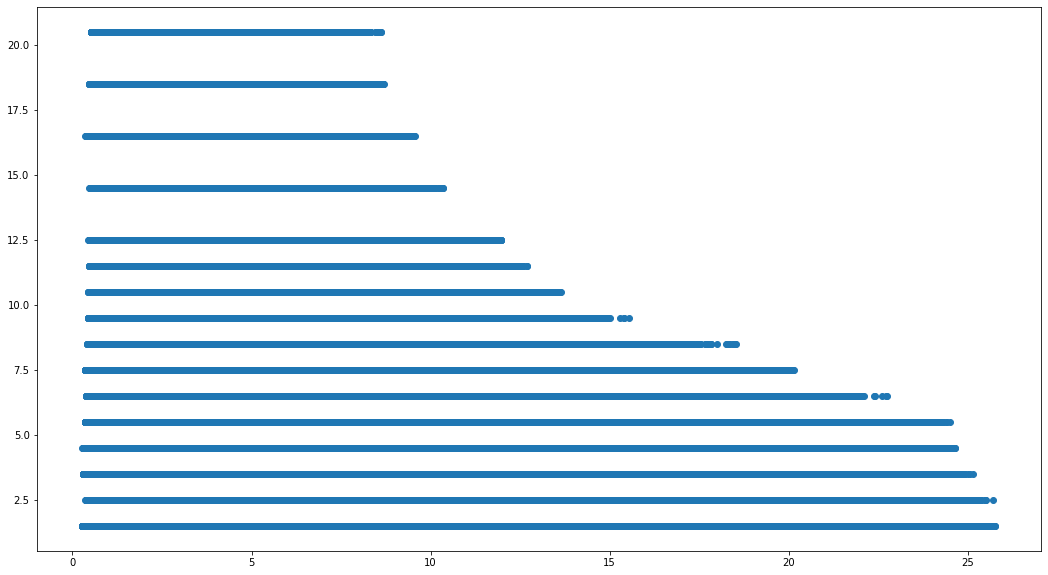

<IPython.core.display.Javascript object>

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(trout_training_df['Water_Temp_C'], trout_training_df['Depth_m'])

In [30]:
import numpy as np
outliers = np.where(trout_training_df['Water_Temp_C'] > 17)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


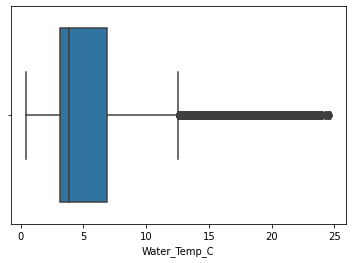

<IPython.core.display.Javascript object>

In [31]:
sns.boxplot(trout_testing_features_df['Water_Temp_C'])

In [6]:
# Process raw data
def calculate_day_of_year(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    day_of_year = date.timetuple().tm_yday
    return day_of_year


def add_datetime_columns(df):
    df["Date"] = df["Date_Time"].str[:10]
    df = df[df["Depth_m"] == 10.5]
    df["Time"] = df["Date_Time"].str[-8:-6].astype(int)
    df["Month"] = df["Date_Time"].str[5:7].astype(int)
    df["Day_of_Year"] = df.apply(lambda x: calculate_day_of_year(x["Date"]), axis=1)
    return df

<IPython.core.display.Javascript object>

In [7]:
trout_training_selected_df = add_datetime_columns(trout_training_df)
trout_training_selected_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date_Time,Water_Temp_C,Depth_m,Date,Time,Month,Day_of_Year
9,2012-04-20 00:00:00,5.076,10.5,2012-04-20,0,4,111
25,2012-04-20 01:00:00,4.999,10.5,2012-04-20,1,4,111
41,2012-04-20 02:00:00,4.895,10.5,2012-04-20,2,4,111
57,2012-04-20 03:00:00,4.921,10.5,2012-04-20,3,4,111
73,2012-04-20 04:00:00,4.973,10.5,2012-04-20,4,4,111
...,...,...,...,...,...,...,...
839144,2018-04-19 19:00:00,1.398,10.5,2018-04-19,19,4,109
839160,2018-04-19 20:00:00,1.398,10.5,2018-04-19,20,4,109
839176,2018-04-19 21:00:00,1.398,10.5,2018-04-19,21,4,109
839192,2018-04-19 22:00:00,1.398,10.5,2018-04-19,22,4,109


<IPython.core.display.Javascript object>

In [8]:
X = trout_training_selected_df[["Day_of_Year", "Time", "Month"]]
y = trout_training_selected_df[["Water_Temp_C"]].to_numpy()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Expand features
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# Train classifer
linreg = LinearRegression().fit(X_train_poly, y_train)
y_pred = linreg.predict(X_test_poly)
mean_squared_error(y_test, y_pred)

1.7676809135876663

<IPython.core.display.Javascript object>

In [9]:
# create test dataframe
date_time_list = list(trout_testing_features_df["Date_Time"].unique())
depth_list = [10.5 for i in range(len(date_time_list))]
trout_testing_df = pd.DataFrame(
    data={"Date_Time": date_time_list, "Depth_m": depth_list}
)
trout_testing_selected_df = add_datetime_columns(trout_testing_df)

# Define X and y
X_real_test = trout_testing_selected_df[["Day_of_Year", "Time", "Month"]]
# Scale and feature expansion
X_real_test_scaled = scaler.transform(X_real_test)
X_real_test_poly = poly.transform(X_real_test_scaled)
# Train classifer
y_real_pred = linreg.predict(X_real_test_poly)

# Output csv
water_temp_list = list(y_real_pred.flatten())
date_time_kaggle_list = []
for i in date_time_list:
    date = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    date_kaggle = date.strftime("%-m/%-d/%Y %-H:%M")
    date_time_kaggle_list.append(date_kaggle)
trout_pred_result = pd.DataFrame(
    data={"Date_Time": date_time_kaggle_list, "Water_Temp_C": water_temp_list}
)
# Modify results
# trout_pred_result["Water_Temp_C"] = trout_pred_result["Water_Temp_C"] - 2

trout_pred_result.to_csv(r"Trout_prediction.csv", index=False)

<IPython.core.display.Javascript object>

In [10]:
trout_pred_result

,Date_Time,Water_Temp_C
0,4/20/2018 0:00,3.633141
1,4/20/2018 1:00,3.627830
2,4/20/2018 2:00,3.614130
3,4/20/2018 3:00,3.598850
4,4/20/2018 4:00,3.586041
...,...,...
8755,4/19/2019 19:00,3.568667
8756,4/19/2019 20:00,3.579093
8757,4/19/2019 21:00,3.589256
8758,4/19/2019 22:00,3.594654


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


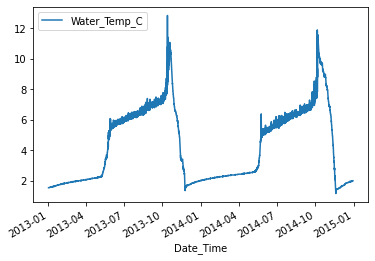

<IPython.core.display.Javascript object>

In [11]:
trout_training_selected = trout_training_df[
    (trout_training_df["Date"] > "2013-01-01")
    & (trout_training_df["Date"] < "2014-12-30")
]

trout_training_selected["Date_Time"] = pd.to_datetime(
    trout_training_selected["Date_Time"]
)
trout_training_selected = trout_training_selected[
    trout_training_selected["Depth_m"] == 10.5
]
trout_training_selected.plot(x="Date_Time", y="Water_Temp_C")